In [1]:
# python3 -m venv ha_influxdb_venv
# source ha_influxdb_venv/bin/activate
# pip install --upgrade pip
# pip install influxdb
# pip install pandas
# pip install matplotlib
# pip install jupyter
# jupyter notebook

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
import pandas as pd
from influxdb import DataFrameClient

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
client = DataFrameClient(host='192.168.1.5', port=8086, username='jupyterlab', password='jupyterlab', database='homeassistant')

In [5]:
client.ping()

'1.8.10'

In [6]:
client.get_list_measurements()

[{'name': ' '},
 {'name': '%'},
 {'name': '% available'},
 {'name': 'A'},
 {'name': 'B'},
 {'name': 'CAQI'},
 {'name': 'Connections'},
 {'name': 'Cos φ'},
 {'name': 'GB'},
 {'name': 'GHz'},
 {'name': 'GiB'},
 {'name': 'KiB/s'},
 {'name': 'MB'},
 {'name': 'Mb/s'},
 {'name': 'MiB'},
 {'name': 'PLN'},
 {'name': 'V'},
 {'name': 'VA'},
 {'name': 'VAr'},
 {'name': 'W'},
 {'name': 'cm'},
 {'name': 'dBm'},
 {'name': 'floors'},
 {'name': 'fps'},
 {'name': 'gCO2eq/kWh'},
 {'name': 'h'},
 {'name': 'hPa'},
 {'name': 'hPa/h'},
 {'name': 'kB'},
 {'name': 'kWh'},
 {'name': 'lqi'},
 {'name': 'lx'},
 {'name': 'm'},
 {'name': 'm/s'},
 {'name': 'ms'},
 {'name': 'm³'},
 {'name': 'objects'},
 {'name': 'packets'},
 {'name': 'packets/s'},
 {'name': 'pending update(s)'},
 {'name': 'queries'},
 {'name': 'requests'},
 {'name': 's'},
 {'name': 'state'},
 {'name': 'steps'},
 {'name': '°C'},
 {'name': '°C/h'},
 {'name': 'µGHz/s'},
 {'name': 'µg/m³'},
 {'name': '℃'}]

In [7]:
client.get_list_series()

['\\ ,domain=sensor,entity_id=tasmota_dgm_energy_totalstarttime_2',
 '\\ ,domain=sensor,entity_id=tasmota_energy_totalstarttime',
 '\\ ,domain=sensor,entity_id=tasmota_energy_totalstarttime_2',
 '\\ ,domain=sensor,entity_id=tasmota_gosund_energy_totalstarttime',
 '%,domain=sensor,entity_id=adguard_dns_queries_blocked_ratio',
 '%,domain=sensor,entity_id=airly_humidity_2',
 '%,domain=sensor,entity_id=disk_use_percent',
 '%,domain=sensor,entity_id=grid_fossil_fuel_percentage',
 '%,domain=sensor,entity_id=hp_deskjet_1510_series_black',
 '%,domain=sensor,entity_id=hp_deskjet_1510_series_tri_color',
 '%,domain=sensor,entity_id=ip_webcam_battery_level',
 '%,domain=sensor,entity_id=iphonejm_battery_level',
 '%,domain=sensor,entity_id=mold_indicator',
 '%,domain=sensor,entity_id=motion_sensor_2_battery',
 '%,domain=sensor,entity_id=motion_sensor_battery',
 '%,domain=sensor,entity_id=processor_use',
 '%,domain=sensor,entity_id=xiaomi_ala_battery_level',
 '%,domain=sensor,entity_id=xiaomi_ala_bat

## query #1: wszystkie cechy dla "°C" 

In [8]:
results = client.query('SELECT * FROM "°C" LIMIT 5')   # LIMIT 5
results

defaultdict(list,
            {'°C':                                  device_class_str  domain  \
             2021-11-01 00:00:11.973617+00:00      temperature  sensor   
             2021-11-01 00:00:26.975167+00:00      temperature  sensor   
             2021-11-01 00:00:41.977120+00:00      temperature  sensor   
             2021-11-01 00:00:42.620802+00:00      temperature  sensor   
             2021-11-01 00:00:42.627261+00:00             None  sensor   
             
                                                              entity_id  \
             2021-11-01 00:00:11.973617+00:00     processor_temperature   
             2021-11-01 00:00:26.975167+00:00     processor_temperature   
             2021-11-01 00:00:41.977120+00:00     processor_temperature   
             2021-11-01 00:00:42.620802+00:00  xiaomi_salon_temperature   
             2021-11-01 00:00:42.627261+00:00                 dew_point   
             
                                                   fri

In [9]:
results["°C"]

,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
2021-11-01 00:00:11.973617+00:00,temperature,sensor,processor_temperature,Processor temperature,total,36.00
2021-11-01 00:00:26.975167+00:00,temperature,sensor,processor_temperature,Processor temperature,total,35.00
2021-11-01 00:00:41.977120+00:00,temperature,sensor,processor_temperature,Processor temperature,total,34.00
2021-11-01 00:00:42.620802+00:00,temperature,sensor,xiaomi_salon_temperature,Salon Temp,measurement,21.10
2021-11-01 00:00:42.627261+00:00,None,sensor,dew_point,dew point,None,8.99


## query #2: wszystkie cechy dla "°C" z ostatnich 30 dni

In [10]:
results = client.query('SELECT * FROM "°C" WHERE time > now() - 30d AND time < now()')
df = results['°C']
df.head()

,attribution_str,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
2022-06-20 08:18:22.847018+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,49.0
2022-06-20 08:18:37.841823+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,52.0
2022-06-20 08:18:59.139557+00:00,None,temperature,sensor,xiaomi_lazienka_dol_temperature,Xiaomi_Lazienka_dol Temperature,measurement,21.7
2022-06-20 08:18:59.141146+00:00,None,None,sensor,mean_temp,mean_temp,None,22.2
2022-06-20 08:18:59.241147+00:00,None,temperature,sensor,xiaomi_lazienka_dol_temperature_2,Xiaomi_Lazienka_dol Temperature,measurement,21.7


## query #3: wszystkie cechy dla "°C" z ostatnich 30 dni dla wybranego sensora

In [11]:
df_airly_temp_30 = df[df['entity_id'] == 'airly_temperature_2' ]
df_airly_temp_30.head()

,attribution_str,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
2022-06-20 08:19:26.287150+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,19.6
2022-06-20 08:29:26.328958+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,19.7
2022-06-20 08:39:26.329437+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,19.8
2022-06-20 08:44:26.321408+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,19.9
2022-06-20 08:54:26.333359+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,20.1


## nowy dataframe dla wybranego sensora

In [12]:
new_df = df_airly_temp_30.drop(columns=['attribution_str', 'device_class_str', 'domain', 'entity_id', 'friendly_name_str', 'state_class_str' ])
new_df

,value
2022-06-20 08:19:26.287150+00:00,19.6
2022-06-20 08:29:26.328958+00:00,19.7
2022-06-20 08:39:26.329437+00:00,19.8
2022-06-20 08:44:26.321408+00:00,19.9
2022-06-20 08:54:26.333359+00:00,20.1
...,...
2022-07-20 07:46:48.298050+00:00,21.5
2022-07-20 07:51:48.318931+00:00,21.7
2022-07-20 07:56:48.291734+00:00,21.9
2022-07-20 08:01:48.315988+00:00,22.2


## grupowanie po 1D

In [13]:
tab = new_df.groupby(pd.Grouper(freq='D')).sum()
tab.head()

,value
2022-06-20 00:00:00+00:00,2287.5
2022-06-21 00:00:00+00:00,1632.5
2022-06-22 00:00:00+00:00,3054.2
2022-06-23 00:00:00+00:00,3639.9
2022-06-24 00:00:00+00:00,4040.2


<AxesSubplot:>

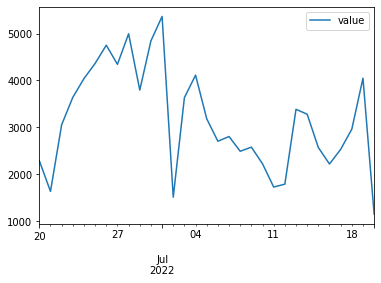

In [14]:
new_df.groupby(pd.Grouper(freq='D')).sum().plot()

## grupowanie po 1H

In [15]:
tab = new_df.groupby(pd.Grouper(freq='H')).sum()
tab.head()

,value
2022-06-20 08:00:00+00:00,99.1
2022-06-20 09:00:00+00:00,251.0
2022-06-20 10:00:00+00:00,222.6
2022-06-20 11:00:00+00:00,136.9
2022-06-20 12:00:00+00:00,67.8


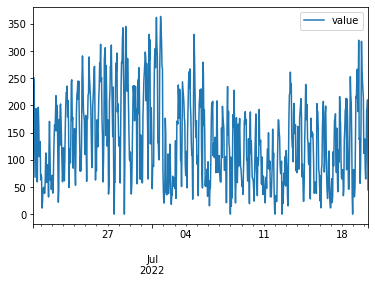

In [16]:
tab = new_df.groupby(pd.Grouper(freq='H')).sum().plot()